<a href="https://colab.research.google.com/github/foramjivani/Coursera_Capstone/blob/main/Analyzing_Neighborhoods_in_Bangalore%2C_India_for_Opening_a_Shopping_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##             Analyzing Neighborhoods in Bangalore, India for Opening a Shopping Mall

> Foram Jivani

> 18 Apr, 2021




# 1. Introduction & Business problem

> Bangalore, officially known as Bengaluru, is the capital and the largest city of the Indian state of Karnataka and is one of the most densely populated cities in the world.The multi-cultural nature of the city is fun to live. However, even though bangalore is very big there are not many shopping malls in the city. And the current traffic problems in bangalore make it difficult for people to go for shopping mall which is at far end of city where they are living. Moreover it takes half a day to travel to famous shopping malls in Bangalore. Thus, the aim of this project is to study the neighborhoods in Bangalore to determine possible locations for opening a shopping mall. This project can be useful for business owners and entrepreneurs who are looking to invest in a shopping mall in Bangalore. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders. Moreover it is also useful for people that are new to Bangalore to figure out what shopping malls are worth going to and where they are. 


# 2. Data Collection

> The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.




## 2.1 Neighborhoods Data


> Neighbourhood data is taken from https://kaggle.com The data is read into a pandas data frame using the read_csv() method. 



##2.2 Geographical Coordinates

> The geographical coordinates for Bangalore data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Bangalore using the Folium library in python. These coordinates are then further used for plotting using the Folium library in python.



## 2.3 Venue Data

> The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Bangalore and is used to study the popular venues of different neighborhoods. 

> After finding the list of neighbourhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighbourhood. For each neighbourhood, we have chosen the radius to be 1000 meters.

> The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

        1. Neighbourhood : Name of the Neighbourhood
        2. Neighbourhood Latitude : Latitude of the Neighbourhood
        3. Neighbourhood Longitude : Longitude of the Neighbourhood
        4. Venue : Name of the Venue
        5. Venue Latitude : Latitude of Venue
        6. Venue Longitude : Longitude of Venue
        7. Venue Category : Category of Venue


# 3. Methodology

### importing all the required packages.

In [ ]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score
from bs4 import BeautifulSoup

%matplotlib notebook

print('All libraries imported.')

     |████████████████████████████████| 102kB 4.2MB/s 
All libraries imported.


## Data Retrieval

In [ ]:
df = pd.read_csv('/content/blr_neighborhoods.csv')
df.head(10)

,Unnamed: 0,Neighborhood,Latitude,Longitude
0,0,Agram,45.813177,15.977048
1,1,Amruthahalli,13.066513,77.596624
2,2,Attur,11.663711,78.533551
3,3,Banaswadi,13.014162,77.651854
4,4,Bellandur,58.235358,26.683116
5,5,Bhattarahalli,13.025800,77.714279
6,6,Bidrahalli,14.577426,74.928560
7,7,Byatarayanapura,13.062074,77.596392
8,8,Devanagundi,12.973613,77.839402
9,9,Devasandra,12.757227,77.647280


## Feature Selection

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.head(10)

,Neighborhood,Latitude,Longitude
0,Agram,45.813177,15.977048
1,Amruthahalli,13.066513,77.596624
2,Attur,11.663711,78.533551
3,Banaswadi,13.014162,77.651854
4,Bellandur,58.235358,26.683116
5,Bhattarahalli,13.025800,77.714279
6,Bidrahalli,14.577426,74.928560
7,Byatarayanapura,13.062074,77.596392
8,Devanagundi,12.973613,77.839402
9,Devasandra,12.757227,77.647280


## Data Wrangling

In [ ]:
df['Neighborhood'].value_counts()

Kodigehalli          4
Kannamangala         3
Akkur                2
Mathikere            2
Shivanapura          2
                    ..
Achalu               1
Kanakapura           1
Bangalore City       1
Hullegowdanahalli    1
Sasalu               1
Name: Neighborhood, Length: 328, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Neighborhood'].value_counts()

Kodigehalli         2
Vanakanahalli       1
Mugabala            1
Kothanur            1
Basavanagudi H.O    1
                   ..
Nelamangala         1
Srirampuram         1
Chunchanakuppe      1
Dobbespet           1
Sasalu              1
Name: Neighborhood, Length: 328, dtype: int64

In [ ]:
df[df['Neighborhood']=="Kodigehalli"]

,Neighborhood,Latitude,Longitude
24,Kodigehalli,13.003167,77.727283


In [ ]:
df.drop(104, inplace=True)

In [ ]:
df['Neighborhood'].value_counts()

Vanakanahalli       1
Mathikere           1
Aluru               1
Kothanur            1
Basavanagudi H.O    1
                   ..
Nelamangala         1
Srirampuram         1
Chunchanakuppe      1
Dobbespet           1
Sasalu              1
Name: Neighborhood, Length: 328, dtype: int64

## Data Visualization

> Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Bangalore using GeoPy.



In [ ]:
from geopy.geocoders import Nominatim 
address = 'Bangalore, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Bangalore are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Bangalore are 12.9791198, 77.5912997.


### Neighborhoods in Bangalore

In [ ]:
map_blr = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blr)  
    
map_blr

## Using Foursquare API

> We have worked with Foursquare API in assignement. We can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues.



In [ ]:
#hidden

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = ''
LIMIT = 200
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
# #pull the actual data from the Foursquare API

# venues = results['response']['groups'][0]['items']
# nearby_venues = json_normalize(venues)
# filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
# nearby_venues
# nearby_venues =nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# nearby_venues.head()

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results['meta'])
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
nearby_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Agram
Amruthahalli
Attur
Banaswadi
Bellandur
Bhattarahalli
Bidrahalli
Byatarayanapura
Devanagundi
Devasandra
Doddagubbi
Doddanekkundi
Domlur
EPIP
Fraser Town
Gunjur
HighCourt
Hoodi
Horamavu
Indiranagar S.O (Bangalore)
Jakkur
Kadugodi
Kalkunte
Kannamangala
Kodigehalli
Kothanur
Krishnarajapuram
Kundalahalli
Lingarajapuram
Mahadevapura
Medimallasandra
Mundur
Museum Road
NAL
Panathur
Rajanakunte
Sadashivanagar
Samethanahalli
Singanayakanahalli
Vasanthanagar
Venkateshapura
Vimanapura
Virgonagar
Whitefield
Yelahanka
Adugodi
Agara
Anjanapura
Banashankari
Bannerghatta
Basavanagudi H.O
Begur
Bolare
Bommanahalli S.O (Bangalore)
Chandapura
Chickpet
Chikkalasandra
Deepanjalinagar
Doddakallasandra
Girinagar S.O (Bangalore)
Gottigere
Haragadde
Hennagara
Hulimangala
Hulimavu
Huskur
Jayanagar H.O
Jigani
Kalkere
Kallubalu
Kathriguppe
Kengeri
Konanakunte
Koramangala
Kumbalagodu
Madivala
Mallathahalli
Mavalli
Nayandahalli
Ragihalli
Ramohalli
Sakalavara
Shanthinagar
Singasandra
Subramanyapura
Sulikere
Tar

In [ ]:
print(nearby_venues.shape)
nearby_venues.head(10)

(1645, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agram,45.813177,15.977048,Amélie,45.813842,15.979011,Dessert Shop
1,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,45.813032,15.976868,Plaza
2,Agram,45.813177,15.977048,Vinodol,45.811666,15.975643,Mediterranean Restaurant
3,Agram,45.813177,15.977048,Cremme Zagreb,45.814987,15.976296,Dessert Shop
4,Agram,45.813177,15.977048,Tržnica Dolac,45.814070,15.977261,Farmers Market
5,Agram,45.813177,15.977048,Cvjetni trg,45.812251,15.974208,Plaza
6,Agram,45.813177,15.977048,Gajbica,45.813531,15.979550,Bistro
7,Agram,45.813177,15.977048,A Burger & Champagne Bar,45.813387,15.980151,Restaurant
8,Agram,45.813177,15.977048,Capuciner Grill & Steak,45.815103,15.978144,Steakhouse
9,Agram,45.813177,15.977048,Submarine BBQ,45.812223,15.974713,Burger Joint


In [ ]:
nearby_venues.to_csv('neaby_veneus_200_1000.csv')

In [ ]:
nearby_venues = pd.read_csv('/content/neaby_veneus_200_1000.csv')

In [ ]:
nearby_venues.groupby('Venue Category').count()['Venue'].sort_values(ascending=False)

Venue Category
Indian Restaurant       236
Café                    115
Ice Cream Shop           53
Fast Food Restaurant     49
Coffee Shop              47
                       ... 
Dry Cleaner               1
Optical Shop              1
Office                    1
Escape Room               1
Yoga Studio               1
Name: Venue, Length: 229, dtype: int64

In [ ]:
nearby_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Achitnagar,4,4,4,4,4,4,4
1,Adugodi,48,48,48,48,48,48,48
2,Agram,100,100,100,100,100,100,100
3,Akkur,18,18,18,18,18,18,18
4,Alahalli,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
125,Whitefield,6,6,6,6,6,6,6
126,Yadavanahalli,4,4,4,4,4,4,4
127,Yelachenahalli,6,6,6,6,6,6,6
128,Yelahanka,12,12,12,12,12,12,12


In [ ]:
print("There are {} unique categories".format(nearby_venues['Venue Category'].nunique()))

There are 229 unique categories


In [ ]:
nearby_venues['Venue Category'].unique()

array(['Dessert Shop', 'Plaza', 'Mediterranean Restaurant',
       'Farmers Market', 'Bistro', 'Restaurant', 'Steakhouse',
       'Burger Joint', 'Café', 'Bar', 'Coffee Shop', 'Pie Shop', 'Pub',
       'Department Store', 'Museum', 'Pedestrian Plaza', 'Fish Market',
       'Theater', 'Hostel', 'Comfort Food Restaurant', 'Escape Room',
       'Hotel', 'Cocktail Bar', 'Italian Restaurant',
       'Seafood Restaurant', 'Historic Site', 'Brewery', 'Park',
       'Eastern European Restaurant', 'Scenic Lookout', 'Wine Bar',
       'Modern European Restaurant', 'Breakfast Spot', 'Pizza Place',
       'Bakery', 'Gastropub', 'Bookstore', 'Light Rail Station',
       'Board Shop', 'Art Museum', 'Sculpture Garden',
       'Indie Movie Theater', 'Movie Theater', 'Perfume Shop',
       'Bubble Tea Shop', 'Ice Cream Shop', 'Indian Restaurant',
       'Fast Food Restaurant', 'Bus Station', 'Pharmacy',
       'Electronics Store', 'Chinese Restaurant',
       'Vegetarian / Vegan Restaurant', 'Arts & Cr

### Let's see which neighbourhood has the most venues

In [ ]:
individual_bangalore_venue_count = nearby_venues.groupby('Neighborhood')['Venue'].count().to_frame()
individual_bangalore_venue_count.sort_values(by=['Venue'],ascending=False)

,Venue
Neighborhood,
Koramangala,100
Begur,100
Agram,100
Indiranagar S.O (Bangalore),100
Jayanagar H.O,100
...,...
Mathahalli,1
Medimallasandra,1
Mundur,1


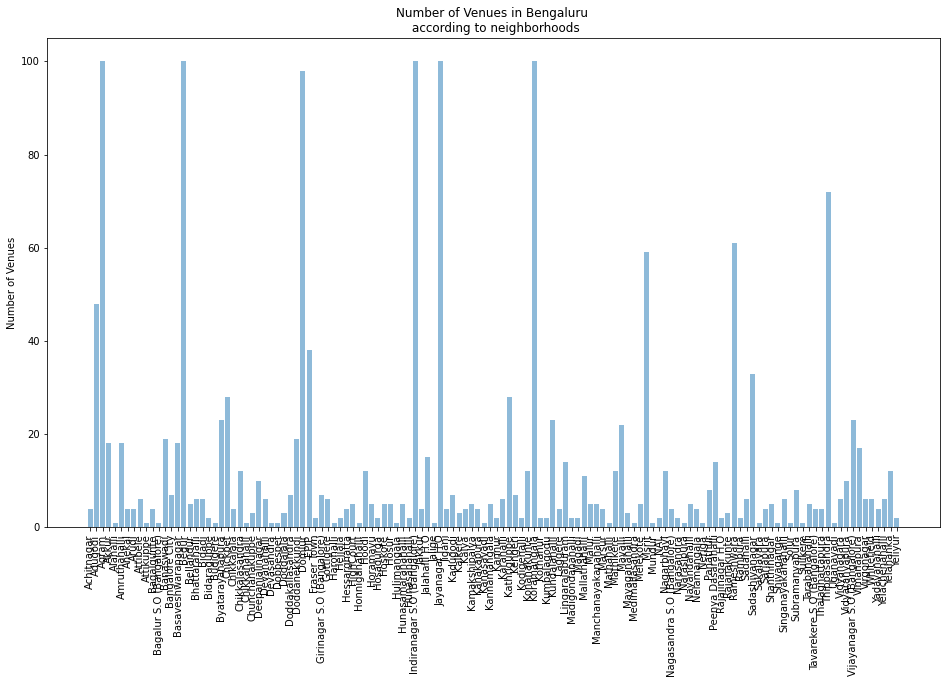

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
objects=individual_bangalore_venue_count.index
y_pos=np.arange(len(objects))
freq=individual_bangalore_venue_count['Venue']

plt.figure(figsize=[16,9])
plt.bar(y_pos,freq,align='center',alpha=0.5)
plt.xticks(y_pos,objects,rotation=90)
plt.ylabel('Number of Venues')
plt.title('Number of Venues in Bengaluru \n according to neighborhoods')
plt.show()

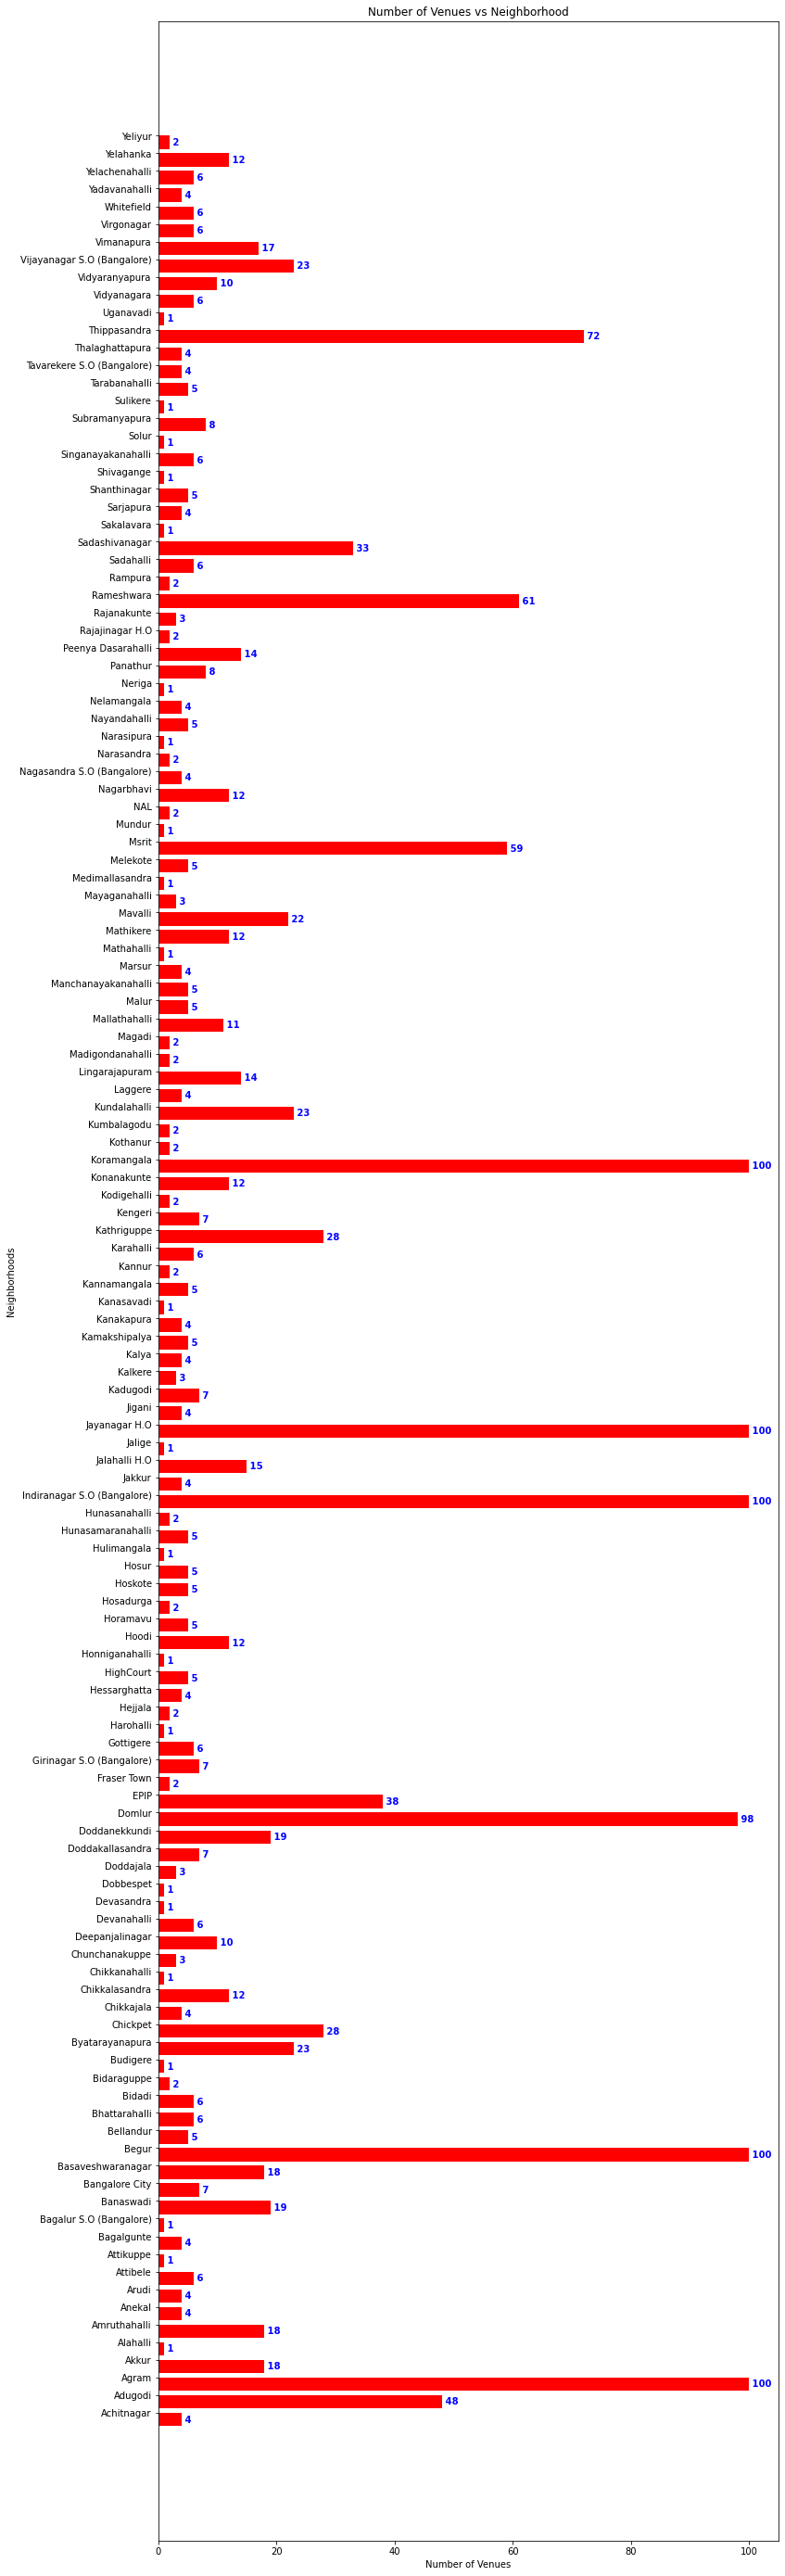

In [ ]:
x = individual_bangalore_venue_count.index.to_list()
y = individual_bangalore_venue_count['Venue'].to_list()

fig, ax = plt.subplots(figsize=(12, 50))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
  plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.title('Number of Venues vs Neighborhood')
plt.xlabel('Number of Venues')
plt.ylabel('Neighborhoods') 
plt.show()     


In [ ]:
# #individual_bangalore_venue_count.reset_index(inplace=True)
# individual_bangalore_venue_count.plot(kind = 'barh',color = 'red',figsize=(12, 40))
# plt.xlabel('Number of Venues')
# plt.ylabel('Neighborhoods')
# # labels = df['Neighborhood'].unique()
# # ticks = np.arange(0,64,1)
# # plt.yticks(ticks,labels)
# plt.title('Neighborhood vs Number of Venues')
# plt.show()

In [ ]:
blore_venues_tmp=nearby_venues['Venue Category'].str.contains("Department Store")#"Indian Restaurant"

selecting only interested venues for our business problem

In [ ]:
shoppingmall_venues = [ "Shopping Mall", "Shopping Plaza", "Mall"
]

In [ ]:
store_venues = ["Convenience Store" ,"Grocery Store", "Fruit & Vegetable Store", 
       "Outlet Store", "Department Store", 
       "Supermarket", "Shopping Mall", "Shopping Plaza", 
       'Shopping Plaza', 'Warehouse Store',
       'Outlet Store', 'Discount Store',
      'Shop & Service', 'Cheese Shop', 
       'Miscellaneous Shop',  'Market',
       'Frozen Yogurt Shop'
]

In [ ]:
nearby_venues[nearby_venues['Venue Category'].str.contains('|'.join(shoppingmall_venues))]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
304,EPIP,12.977673,77.722200,Inorbit Mall,12.979584,77.728478,Shopping Mall
458,Kadugodi,13.021626,77.766180,M K Retail,13.024792,77.761450,Shopping Plaza
616,Adugodi,12.942847,77.610416,The Forum Mall,12.934603,77.611312,Shopping Mall
876,Jayanagar H.O,12.929273,77.582423,Jayanagar 4th Block Complex,12.929482,77.584433,Shopping Plaza
915,Jayanagar H.O,12.929273,77.582423,The High Street,12.927383,77.586213,Shopping Mall
1152,Bangalore City,13.021626,77.766180,M K Retail,13.024792,77.761450,Shopping Plaza
1182,Jalahalli H.O,13.046453,77.548380,D Needs,13.048883,77.549731,Shopping Mall
1334,Vijayanagar S.O (Bangalore),12.971889,77.545789,G T World Mall,12.973700,77.551614,Shopping Mall
1356,Akkur,50.733978,5.666767,Shopping Haccourt,50.735901,5.668423,Shopping Mall
1490,Rameshwara,12.993658,77.567862,Mantri Square,12.991576,77.571085,Shopping Mall


In [ ]:
blore_venues_new=nearby_venues[nearby_venues['Venue Category'].str.contains('|'.join(shoppingmall_venues))]

### Check neighbourhood which has most and least number of shopping mall/plaza in the area.

In [ ]:
tmp_data=blore_venues_new.groupby('Neighborhood')['Venue'].count()
tmp_data=pd.DataFrame(tmp_data)
tmp_data.sort_values(by = ['Venue'], ascending=False)

,Venue
Neighborhood,
Jayanagar H.O,2
Adugodi,1
Akkur,1
Bangalore City,1
EPIP,1
Jalahalli H.O,1
Kadugodi,1
Rameshwara,1
Vijayanagar S.O (Bangalore),1


In [ ]:
tmp_data.head()

,Venue
Neighborhood,
Adugodi,1
Akkur,1
Bangalore City,1
EPIP,1
Jalahalli H.O,1


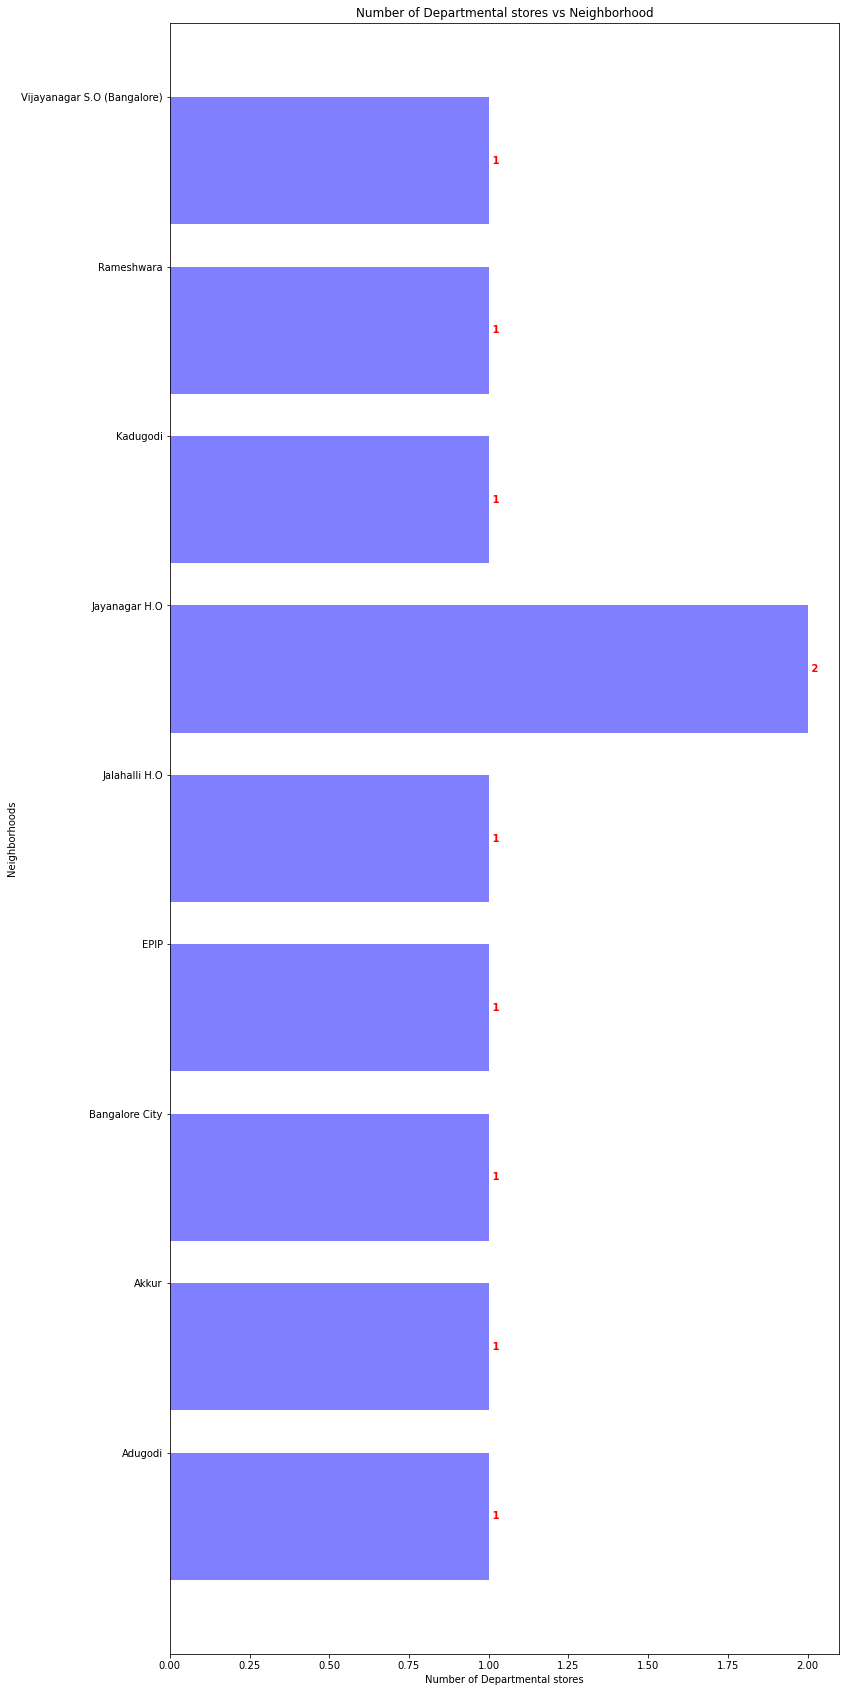

In [ ]:
x = tmp_data.index.to_list()
y = tmp_data['Venue'].to_list()

fig, ax = plt.subplots(figsize=(12, 30))    
#width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue",alpha=0.5)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
  plt.text(v, i, " "+str(v), color='red', va='center', fontweight='bold')
plt.title('Number of Departmental stores vs Neighborhood')
plt.xlabel('Number of Departmental stores')
plt.ylabel('Neighborhoods') 
plt.show()     

In [ ]:
# #individual_bangalore_venue_count.reset_index(inplace=True)
# tmp_data.plot(kind = 'barh',color = 'red',figsize=(12, 40))
# plt.xlabel('Number of Venues')
# plt.ylabel('Neighborhoods')
# # labels = df['Neighborhood'].unique()
# # ticks = np.arange(0,64,1)
# # plt.yticks(ticks,labels)
# plt.title('Neighborhood vs Number of Venues')
# plt.show()

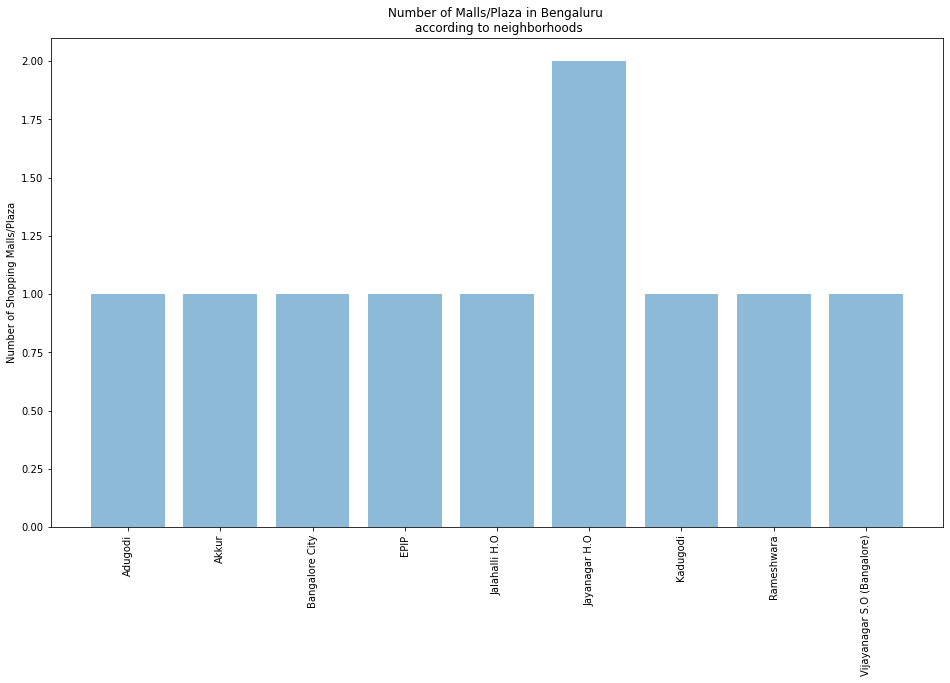

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
objects=tmp_data.index
y_pos=np.arange(len(objects))
freq=tmp_data['Venue']

plt.figure(figsize=[16,9])
plt.bar(y_pos,freq,align='center',alpha=0.5)
plt.xticks(y_pos,objects,rotation=90)
plt.ylabel('Number of Shopping Malls/Plaza')
plt.title('Number of Malls/Plaza in Bengaluru \n according to neighborhoods')
plt.show()

## Analyzing each neighborhood

We can start analyzing each neighborhood by One-hot Encoding to see which categories belong in which neighborhoods.

### one hot encoding

In [ ]:
blr_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
blr_onehot.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Adding Neighborhood column to the one-hot encoded dataframe.

In [ ]:
blr_onehot['Neighborhood'] = nearby_venues['Neighborhood']
blr_onehot.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,...,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram


Moving the Neighborhood column to the first column.

In [ ]:
temp = list(blr_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
blr_onehot = blr_onehot[fixed_columns]

blr_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
blr_onehot.shape

(1645, 230)

Now we can groupby neighborhood and take the mean for all categories.

### groupby neighborhood

In [ ]:
blr_group_sum  = blr_onehot.groupby('Neighborhood', sort=False).sum().reset_index()
print(blr_group_sum.shape)

(130, 230)


In [ ]:
blr_grouped = blr_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(blr_grouped.shape)
blr_grouped.head(10)

(130, 230)


,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Agram,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.010000,0.07,0.0,0.0,0.000000,0.0,0.0,0.0,0.040000,0.01,0.0,0.010000,0.0,0.0,0.0,0.010000,0.010000,0.000000,0.000000,0.030000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.03,0.0,0.0
1,Amruthahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.055556,0.055556,0.000000,0.055556,0.000000,0.166667,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,Banaswadi,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.000000,0.0,0.0,0.052632,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.052632,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Bellandur,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,Bhattarahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,Byatarayanapura,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.043478,0.043478,0.043478,0.043478,0.000000,0.043478,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
6,Devasandra,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,

In [ ]:
blr_grouped.shape

(130, 230)

In order to further understand the data, we can display the top 5 venues of all neighborhoods.

## Top Venues in the Neighbourhoods

In [ ]:
num_top_venues = 5

for hood in blr_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = blr_grouped[blr_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agram----
          venue  freq
0          Café  0.08
1         Plaza  0.08
2           Bar  0.07
3  Dessert Shop  0.05
4       Theater  0.05


----Amruthahalli----
                  venue  freq
0     Indian Restaurant  0.28
1           Bus Station  0.17
2               Brewery  0.06
3  Fast Food Restaurant  0.06
4    Chinese Restaurant  0.06


----Banaswadi----
                           venue  freq
0              Indian Restaurant  0.26
1               Department Store  0.11
2                           Café  0.11
3  Vegetarian / Vegan Restaurant  0.11
4            Arts & Crafts Store  0.05


----Bellandur----
                  venue  freq
0     Convenience Store   0.2
1     Food & Drink Shop   0.2
2            Restaurant   0.2
3                 Hotel   0.2
4  Fast Food Restaurant   0.2


----Bhattarahalli----
               venue  freq
0               Café  0.33
1      Event Service  0.17
2              Hotel  0.17
3  Indian Restaurant  0.17
4        Pizza Place  0.17


----Byata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


               venue  freq
0     Boarding House   0.5
1  Indian Restaurant   0.5
2                ATM   0.0
3               Park   0.0
4          Multiplex   0.0


----Tarabanahalli----
               venue  freq
0             Resort   0.4
1              Hotel   0.2
2    Bed & Breakfast   0.2
3  Indian Restaurant   0.2
4                ATM   0.0


----Vidyaranyapura----
               venue  freq
0  Indian Restaurant   0.3
1   Department Store   0.1
2        Bus Station   0.1
3   Basketball Court   0.1
4        Pizza Place   0.1


----Vijayanagar S.O (Bangalore)----
                  venue  freq
0     Indian Restaurant  0.26
1  Fast Food Restaurant  0.09
2        Breakfast Spot  0.04
3         Metro Station  0.04
4         Deli / Bodega  0.04


----Akkur----
                venue  freq
0         Supermarket  0.22
1                 Bar  0.06
2       Shopping Mall  0.06
3  Chinese Restaurant  0.06
4              Bakery  0.06


----Alahalli----
                venue  freq
0   Food & Drink

Lets now create a dataframe with the top ***n*** common venues for each neighborhood and to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_grouped['Neighborhood']

for ind in np.arange(blr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,Café,Plaza,Bar,Dessert Shop,Theater,Mediterranean Restaurant,Bistro,Historic Site,Restaurant,Pub
1,Amruthahalli,Indian Restaurant,Bus Station,Brewery,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Burger Joint,Hotel,Pizza Place,Bubble Tea Shop
2,Banaswadi,Indian Restaurant,Department Store,Café,Vegetarian / Vegan Restaurant,Intersection,Arts & Crafts Store,Park,Bus Station,Bistro,BBQ Joint
3,Bellandur,Food & Drink Shop,Hotel,Restaurant,Fast Food Restaurant,Convenience Store,IT Services,Flea Market,Financial or Legal Service,Field,Indian Restaurant
4,Bhattarahalli,Café,Indian Restaurant,Pizza Place,Hotel,Event Service,Yoga Studio,Flea Market,Fish Market,Financial or Legal Service,Field
...,...,...,...,...,...,...,...,...,...,...,...
125,Thippasandra,Indian Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Dessert Shop,Bakery,Fast Food Restaurant,Burger Joint,Lounge,Multicuisine Indian Restaurant
126,Uganavadi,Café,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Farm
127,Vidyanagara,Café,Bookstore,Ice Cream Shop,Park,Yoga Studio,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Field
128,Yadavanahalli,Hotel Bar,Resort,Restaurant,Diner,Yoga Studio,Eastern European Restaurant,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant


In [ ]:
neighborhoods_venues_sorted.head(10)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Agram,Café,Plaza,Bar,Dessert Shop,Theater,Mediterranean Restaurant,Bistro,Historic Site,Restaurant,Pub
1,1,Amruthahalli,Indian Restaurant,Bus Station,Brewery,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Burger Joint,Hotel,Pizza Place,Bubble Tea Shop
2,1,Banaswadi,Indian Restaurant,Department Store,Café,Vegetarian / Vegan Restaurant,Intersection,Arts & Crafts Store,Park,Bus Station,Bistro,BBQ Joint
3,1,Bellandur,Food & Drink Shop,Hotel,Restaurant,Fast Food Restaurant,Convenience Store,IT Services,Flea Market,Financial or Legal Service,Field,Indian Restaurant
4,1,Bhattarahalli,Café,Indian Restaurant,Pizza Place,Hotel,Event Service,Yoga Studio,Flea Market,Fish Market,Financial or Legal Service,Field
5,1,Byatarayanapura,Indian Restaurant,Ice Cream Shop,Hotel,Pizza Place,Brewery,Building,Burger Joint,Bus Station,Fast Food Restaurant,Café
6,0,Devasandra,Henan Restaurant,Yoga Studio,Eastern European Restaurant,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market
7,1,Doddanekkundi,Coffee Shop,Indian Restaurant,Department Store,Sports Bar,Motorcycle Shop,Movie Theater,Fast Food Restaurant,Fried Chicken Joint,Multiplex,Mediterranean Restaurant
8,1,Domlur,Indian Restaurant,Café,Italian Restaurant,Pub,Coffee Shop,Restaurant,Hotel,Lounge,Sports Bar,Brewery
9,1,EPIP,Hotel,Indian Restaurant,Restaurant,Café,Coffee Shop,Italian Restaurant,Snack Place,Shopping Mall,Food,Breakfast Spot


In [ ]:
range(3,12)

range(3, 12)

In [ ]:
len(set(neighborhoods_venues_sorted.iloc[:,range(2,6)].values.ravel()))

112

In [ ]:
blr_grouped.shape

(130, 230)

## Clustering neighborhoods 

> Now we can use KMeans clustering method to cluster the neighborhoods.

> First we need to determine how many clusters to use. This will be done using the Silhouette Score.

> We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

### Chnage similar venues as one & Clustering neighborhoods based on interested venues

In [ ]:
print(nearby_venues.shape)
nearby_venues.head()


(1645, 8)


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Agram,45.813177,15.977048,Amélie,45.813842,15.979011,Dessert Shop
1,1,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,45.813032,15.976868,Plaza
2,2,Agram,45.813177,15.977048,Vinodol,45.811666,15.975643,Mediterranean Restaurant
3,3,Agram,45.813177,15.977048,Cremme Zagreb,45.814987,15.976296,Dessert Shop
4,4,Agram,45.813177,15.977048,Tržnica Dolac,45.814070,15.977261,Farmers Market


In [ ]:
df.head()

,Neighborhood,Latitude,Longitude
0,Agram,45.813177,15.977048
1,Amruthahalli,13.066513,77.596624
2,Attur,11.663711,78.533551
3,Banaswadi,13.014162,77.651854
4,Bellandur,58.235358,26.683116


In [ ]:
new_nearby_venues = nearby_venues

In [ ]:
print(new_nearby_venues.shape)
new_nearby_venues.head()

(1645, 8)


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Agram,45.813177,15.977048,Amélie,45.813842,15.979011,Dessert Shop
1,1,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,45.813032,15.976868,Plaza
2,2,Agram,45.813177,15.977048,Vinodol,45.811666,15.975643,Mediterranean Restaurant
3,3,Agram,45.813177,15.977048,Cremme Zagreb,45.814987,15.976296,Dessert Shop
4,4,Agram,45.813177,15.977048,Tržnica Dolac,45.814070,15.977261,Farmers Market


In [ ]:
dept_store_venues = ["Convenience Store" ,"Grocery Store", "Fruit & Vegetable Store", 
       "Outlet Store", "Department Store", 
       "Supermarket",  
       'Outlet Store', 'Discount Store',
      'Shop & Service', 'Cheese Shop', 
       'Miscellaneous Shop',  'Market',
       'Frozen Yogurt Shop'
]

In [ ]:
shp_mall_venues = ["Shopping Mall","Shopping Plaza"]

In [ ]:
nearby_venues[nearby_venues["Venue Category"].isin(shp_mall_venues)]["Venue Category"] #= "Shopping Mall"

304      Shopping Mall
458     Shopping Plaza
616      Shopping Mall
876     Shopping Plaza
915      Shopping Mall
1152    Shopping Plaza
1182     Shopping Mall
1334     Shopping Mall
1356     Shopping Mall
1490     Shopping Mall
Name: Venue Category, dtype: object

In [ ]:
new_nearby_venues.loc[(new_nearby_venues["Venue Category"].isin(shp_mall_venues)),"Venue Category"] = "Shopping Mall"

In [ ]:
new_nearby_venues[new_nearby_venues["Venue Category"].isin(shp_mall_venues)]["Venue Category"] 

304     Shopping Mall
458     Shopping Mall
616     Shopping Mall
876     Shopping Mall
915     Shopping Mall
1152    Shopping Mall
1182    Shopping Mall
1334    Shopping Mall
1356    Shopping Mall
1490    Shopping Mall
Name: Venue Category, dtype: object

In [ ]:
new_blr_onehot = pd.get_dummies(new_nearby_venues[['Venue Category']], prefix="", prefix_sep="")
new_blr_onehot.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_blr_onehot.columns.values

In [ ]:
len(new_blr_onehot.columns.values)

228

In [ ]:
new_blr_onehot['Neighborhood'] = new_nearby_venues['Neighborhood']
new_blr_onehot.head()

,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,...,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agram


In [ ]:
new_blr_onehot.shape

(1645, 229)

In [ ]:
temp = list(new_blr_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
new_blr_onehot = new_blr_onehot[fixed_columns]

new_blr_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_blr_group_sum  = new_blr_onehot.groupby('Neighborhood', sort=False).sum().reset_index()
print(new_blr_group_sum.shape)

(130, 229)


In [ ]:
new_blr_grouped = new_blr_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(new_blr_grouped.shape)
new_blr_grouped.head(10)

(130, 229)


,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Agram,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.010000,0.07,0.0,0.0,0.000000,0.0,0.0,0.0,0.040000,0.01,0.0,0.010000,0.0,0.0,0.0,0.010000,0.010000,0.000000,0.000000,0.030000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.03,0.0,0.0
1,Amruthahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.055556,0.055556,0.000000,0.055556,0.000000,0.166667,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,Banaswadi,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.000000,0.0,0.0,0.052632,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.052632,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Bellandur,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,Bhattarahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5,Byatarayanapura,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.043478,0.043478,0.043478,0.043478,0.000000,0.043478,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
6,Devasandra,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,

In [ ]:
interested_cols = new_blr_grouped.columns[new_blr_grouped.columns.str.contains("Shopping Mall")] #store_venues. store_ven2

interested_cols

Index(['Shopping Mall'], dtype='object')

In [ ]:
len(new_blr_grouped[interested_cols]> 0)

130

In [ ]:
lst_cols = ["Neighborhood"] +  interested_cols.to_list()
lst_cols

['Neighborhood', 'Shopping Mall']

In [ ]:
new_dept_store_blr = new_blr_grouped[lst_cols] #temp

In [ ]:
new_dept_store_blr.head()

,Neighborhood,Shopping Mall
0,Agram,0.0
1,Amruthahalli,0.0
2,Banaswadi,0.0
3,Bellandur,0.0
4,Bhattarahalli,0.0


#### Model Building (K-Means)

In [ ]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [ ]:
maxk = 8
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = new_dept_store_blr.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

We can now display the scores for different number of clusters and plot the data as well.

[0.9672844712285303, 0.9588464465116374, 0.9809128029592069, 0.9727865649481696, 0.9681647700763748, 0.9597086123447313, 0.9583172852788236]
[2, 3, 4, 5, 6, 7, 8]


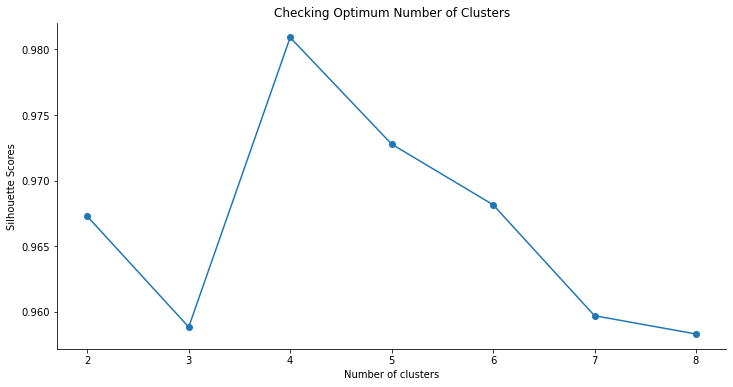

In [ ]:
print(scores)
print(kval)
plot(kval, scores)

> We can see that the silhouette scores are not increasingn as we increase the number of clusters. This means that the inter-cluster distance between different clusters is not very high over the range of k-values. However, we will try to cluster our data as best as we can. For this, we will use 4 clusters for our clustering model since it provides the highest silhouette score as seen above.

In [ ]:
k = 4

new_blr_clustering = new_dept_store_blr.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42).fit(new_blr_clustering) #Can choose any random_state

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
new_blr_merged = new_dept_store_blr.copy()

# add clustering labels
new_blr_merged["Cluster Labels"] = kmeans.labels_

In [ ]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
new_blr_merged = new_blr_merged.join(df.set_index("Neighborhood"), on="Neighborhood")

In [ ]:
new_blr_merged.head()

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Agram,0.0,0,45.813177,15.977048
1,Amruthahalli,0.0,0,13.066513,77.596624
2,Banaswadi,0.0,0,13.014162,77.651854
3,Bellandur,0.0,0,58.235358,26.683116
4,Bhattarahalli,0.0,0,13.025800,77.714279


In [ ]:
# sort the results by Cluster Labels
print(new_blr_merged.shape)
new_blr_merged.sort_values(["Cluster Labels"], inplace=True)
new_blr_merged

(130, 5)


,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Agram,0.000000,0,45.813177,15.977048
94,Honniganahalli,0.000000,0,12.434957,77.281452
93,Hejjala,0.000000,0,12.855369,77.416984
92,Harohalli,0.000000,0,13.024442,77.938731
91,Doddajala,0.000000,0,13.176735,77.652050
...,...,...,...,...,...
64,Jalahalli H.O,0.066667,2,13.046453,77.548380
118,Rameshwara,0.016393,3,12.993658,77.567862
33,Adugodi,0.020833,3,12.942847,77.610416
42,Jayanagar H.O,0.020000,3,12.929273,77.582423


Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_blr_merged['Latitude'], new_blr_merged['Longitude'], new_blr_merged['Neighborhood'], new_blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

In [ ]:
new_blr_merged.loc[new_blr_merged['Cluster Labels'] == 0]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
0,Agram,0.0,0,45.813177,15.977048
94,Honniganahalli,0.0,0,12.434957,77.281452
93,Hejjala,0.0,0,12.855369,77.416984
92,Harohalli,0.0,0,13.024442,77.938731
91,Doddajala,0.0,0,13.176735,77.652050
...,...,...,...,...,...
40,Gottigere,0.0,0,12.856532,77.587724
39,Girinagar S.O (Bangalore),0.0,0,12.940144,77.544500
38,Doddakallasandra,0.0,0,12.885735,77.555745
36,Chikkalasandra,0.0,0,12.912192,77.547634


In [ ]:
new_blr_merged.loc[new_blr_merged['Cluster Labels'] == 1]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
61,Bangalore City,0.142857,1,13.021626,77.76618
16,Kadugodi,0.142857,1,13.021626,77.76618


In [ ]:
new_blr_merged.loc[new_blr_merged['Cluster Labels'] == 2]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
76,Akkur,0.055556,2,50.733978,5.666767
75,Vijayanagar S.O (Bangalore),0.043478,2,12.971889,77.545789
64,Jalahalli H.O,0.066667,2,13.046453,77.548380


In [ ]:
new_blr_merged.loc[new_blr_merged['Cluster Labels'] == 3]

,Neighborhood,Shopping Mall,Cluster Labels,Latitude,Longitude
118,Rameshwara,0.016393,3,12.993658,77.567862
33,Adugodi,0.020833,3,12.942847,77.610416
42,Jayanagar H.O,0.020000,3,12.929273,77.582423
9,EPIP,0.026316,3,12.977673,77.722200


### Clustering neighborhoods based on top venues

In [ ]:
blr_grouped.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Andhra Restaurant,Animal Shelter,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bike Shop,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,...,Snack Place,Soccer Field,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Art,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Toll Booth,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Turkish Restaurant,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Vineyard,Watch Shop,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio
0,Agram,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.000000,0.01,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.01,0.0,0.01,0.0,0.0,0.0,0.01,0.010000,0.000000,0.0,0.030000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0
1,Amruthahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.055556,0.055556,0.0,0.055556,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,Banaswadi,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.00,0.052632,0.0,0.0,0.0,0.0,0.052632,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.052632,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Bellandur,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,Bhattarahalli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
maxk = 30
scores = []
kval = []

for k in range(8, maxk+1):
    cl_df = blr_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.10008892838016634, 0.1080984993050494, 0.11185737306450882, 0.10401142984004709, 0.10704982109740199, 0.13575723837920875, 0.13041652285515823, 0.17634566516382283, 0.18572244819304937, 0.18967894233565985, 0.1937117834507977, 0.19771616487274019, 0.20186528458219552, 0.1220705838760228, 0.1414405332246908, 0.12769799847575755, 0.12556492571497657, 0.1436052094916909, 0.14519985775023425, 0.13737639956955247, 0.15670020709414284, 0.14611829056665754, 0.14550925237361909]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


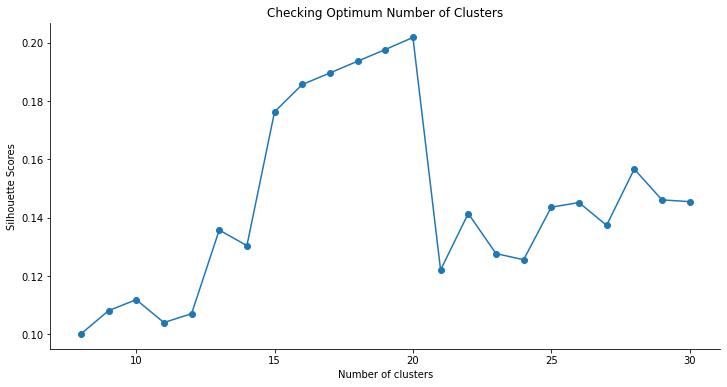

In [ ]:
print(scores)
print(kval)
plot(kval, scores)

In [ ]:
k = 20

blr_clustering = blr_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(blr_clustering) #Can choose any random_state

kmeans.labels_

array([ 1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  8,  3, 12,  1, 10,  1,  6,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 14, 12,  1,  1,  7,  1,  1,  1,  1,  6,  1,
        1,  1,  2,  1, 14, 15, 14,  1,  1, 12,  1, 14,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 14,  7,  1,  1,  1, 18,  1,  1,  1,  9, 19, 14,  4,
       17,  1,  9, 14, 14,  3,  7,  9, 14, 13,  2,  1,  1, 14, 10,  2,  1,
       14, 11, 14,  1, 14,  4,  1,  1,  1,  1,  6,  1, 14, 16,  1,  7,  1,
       13,  1,  1,  1,  5,  1,  1,  6,  6,  1, 10], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
blr2_merged = df
blr2_merged = blr2_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [ ]:
print(blr2_merged.shape)
blr2_merged

(328, 14)


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,1.0,Café,Plaza,Bar,Dessert Shop,Theater,Mediterranean Restaurant,Bistro,Historic Site,Restaurant,Pub
1,Amruthahalli,13.066513,77.596624,1.0,Indian Restaurant,Bus Station,Brewery,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Burger Joint,Hotel,Pizza Place,Bubble Tea Shop
2,Attur,11.663711,78.533551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banaswadi,13.014162,77.651854,1.0,Indian Restaurant,Department Store,Café,Vegetarian / Vegan Restaurant,Intersection,Arts & Crafts Store,Park,Bus Station,Bistro,BBQ Joint
4,Bellandur,58.235358,26.683116,1.0,Food & Drink Shop,Hotel,Restaurant,Fast Food Restaurant,Convenience Store,IT Services,Flea Market,Financial or Legal Service,Field,Indian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Virupakshipura,13.024075,76.469658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,Vishwanathapura,13.273529,77.649099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,Yadamaranahalli,12.427249,77.379083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,Yadavanahalli,12.789855,77.751454,1.0,Hotel Bar,Resort,Restaurant,Diner,Yoga Studio,Eastern European Restaurant,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant


In [ ]:
blr2_merged.dropna(inplace=True)
blr2_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,1.0,Café,Plaza,Bar,Dessert Shop,Theater,Mediterranean Restaurant,Bistro,Historic Site,Restaurant,Pub
1,Amruthahalli,13.066513,77.596624,1.0,Indian Restaurant,Bus Station,Brewery,Pharmacy,Chinese Restaurant,Fast Food Restaurant,Burger Joint,Hotel,Pizza Place,Bubble Tea Shop
3,Banaswadi,13.014162,77.651854,1.0,Indian Restaurant,Department Store,Café,Vegetarian / Vegan Restaurant,Intersection,Arts & Crafts Store,Park,Bus Station,Bistro,BBQ Joint
4,Bellandur,58.235358,26.683116,1.0,Food & Drink Shop,Hotel,Restaurant,Fast Food Restaurant,Convenience Store,IT Services,Flea Market,Financial or Legal Service,Field,Indian Restaurant
5,Bhattarahalli,13.025800,77.714279,1.0,Café,Indian Restaurant,Pizza Place,Hotel,Event Service,Yoga Studio,Flea Market,Fish Market,Financial or Legal Service,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Thippasandra,12.973936,77.650998,1.0,Indian Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Dessert Shop,Bakery,Fast Food Restaurant,Burger Joint,Lounge,Multicuisine Indian Restaurant
342,Uganavadi,13.236588,77.665414,6.0,Café,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market,Farm
346,Vidyanagara,13.018496,76.108893,6.0,Café,Bookstore,Ice Cream Shop,Park,Yoga Studio,Flower Shop,Flea Market,Fish Market,Financial or Legal Service,Field
350,Yadavanahalli,12.789855,77.751454,1.0,Hotel Bar,Resort,Restaurant,Diner,Yoga Studio,Eastern European Restaurant,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(blr2_merged['Latitude'], blr2_merged['Longitude'], blr2_merged['Neighborhood'], blr2_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
new_restaurant_neighborhoods = mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0, 1, 2, 3] + list(range(5, mum_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

In [ ]:
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations

# Results and Discussion

> By analyzing the clusters, it is evident that neighborhoods in cluster 2, 3, and 4 are not well suited for a new shopping mall  since they contain enough number of shopping mall.

> Clusters 1 does not contain any shopping mall and those neighborhood are good choice to open new shopping mall. 

> Thus, the most optimal neighborhoods for opening a shopping mall  are in cluster 1


# Conclusion

> We came to know which neighborhoods are good choice for new shopping mall we can also look into its top venues and rating of those venues  to select final few locations to open a new shopping mall.

> In this project, the neighborhoods in Bangalore, India have been successfully analyzed for determining which would be the best neighborhoods for opening a new shopping mall.

> Based on the analysis, neighborhoods in cluster 1 are recommended as locations for the new shopping mall.

> The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated which were out of the scope for this project and thus were not considered.
